In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

Quantifying the Accuracy Tradeoff Between Random Classifier and Threshold Classifier
- Generate 10000 risk scores ~ Uniform(0,1)
- Simulate true outcome = Bernoulli(risk) 
- Threshold prediction = 1 if risk >= 0.5, 0 else
- Random prediction = Bernoulli(risk) 

Partially Random Classifier:
- Use random prediction if risk within some distance to the threshold (e.g. 0.4 to 0.6)
- Otherwise use threshold prediction

In [2]:
def experiment(lower=0.4, upper=0.6, threshold=0.5):
    outcomes = []
    pred = []
    
    risk = np.random.uniform(0,1,10000)

    for r in risk:
        outcomes.append(np.random.binomial(1, r))
        
        if r<=upper and r>=lower:
            pred.append(np.random.binomial(1, r))
        elif r>=threshold:
            pred.append(1)
        else:
            pred.append(0)

    outcomes = np.array(outcomes)
    pred = np.array(pred)
    
    return accuracy_score(pred, outcomes)

In [3]:
def solution(l=0.4, u=0.6):
    return (2/3)*(u*u*u) - (2/3)*(l*l*l) + (1/2)*(l*l) - (3/2)*(u*u) + u + (1/2)

In [4]:
x = np.linspace(0,0.5,1000)
y = []
z = []
l = []

for i in tqdm(x):
    i = np.abs(i)
    y.append(solution(0.5-i, 0.5+i))
    z.append(experiment(0.5-i, 0.5+i))
    l.append(0.5+i)
    
y = np.array(y)
z = np.array(z)
l = np.array(l)

100%|██████████████████████████████████████| 1000/1000 [00:07<00:00, 137.68it/s]


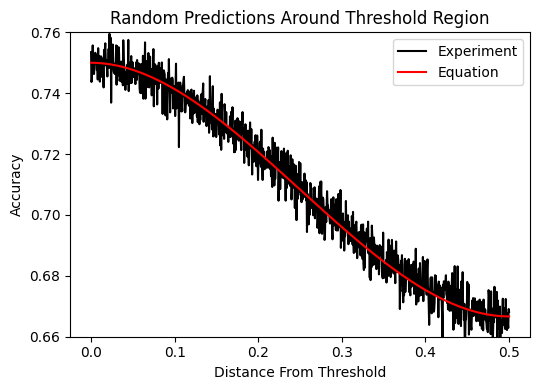

In [5]:
plt.rcParams["figure.figsize"] = [5.5,4]
fig = plt.figure()

plt.ylim(0.66, .76)
#plt.yticks([],fontsize=12)

#plt.xlim(-1,1)
#plt.xticks(np.arange(-50, 55, 25),fontsize=12)

plt.ylabel('Accuracy')
plt.xlabel('Distance From Threshold')
plt.title('Random Predictions Around Threshold Region')

plt.plot(x,z, 'k', label='Experiment')
plt.plot(x,y, 'r', label='Equation')
plt.legend()
#plt.plot(x,upper, '--', color='k')
#plt.plot(x,lower, '--', color='k')
fig.tight_layout()
plt.show()
fig.savefig('random_predictions.png')

In [6]:
x = np.linspace(0,0.5,11)
print("Distance From Threshold\t\tAccuracy")
for i in x:
    print(round(i,2), '\t\t\t\t', round(solution(0.5-i, 0.5+i), 3))

Distance From Threshold		Accuracy
0.0 				 0.75
0.05 				 0.748
0.1 				 0.741
0.15 				 0.732
0.2 				 0.721
0.25 				 0.708
0.3 				 0.696
0.35 				 0.685
0.4 				 0.675
0.45 				 0.669
0.5 				 0.667
